In [5]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import *
from numpy import linalg
import math
# import cProfile
import time
from scipy import io
# DOCUMENTATION: https://docs.scipy.org/doc/scipy/reference/sparse.html
# https://docs.scipy.org/doc/scipy/reference/stats.html
import scipy.sparse as sparse
import scipy.stats as stats

In [10]:
print(io.mminfo('rbs480a.mtx'))
a = io.mmread('rbs480a.mtx')
rbs480a=  a.todense()

(480, 480, 17088, 'coordinate', 'real', 'general')


In [ ]:
np.random.seed(seed=12)  ## for reproducibility
dataset = np.random.binomial(1, 0.1, 20000000).reshape(2000,10000)  ## dummy data
y = np.random.binomial(1, 0.5, 2000)  ## dummy target variable

In [18]:
# sets reproducibility
np.random.seed(5) 
# Poisson
rvs = stats.poisson(18, loc=10).rvs
# generate sparse 5x5 random matrix with density 0.75
A = sparse.random(500, 500, density=0.75, data_rvs=rvs)
A = A.toarray()

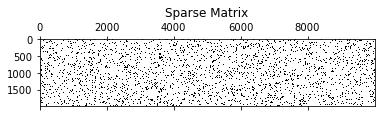

In [13]:
plt.spy(dataset)
plt.title("Sparse Matrix");

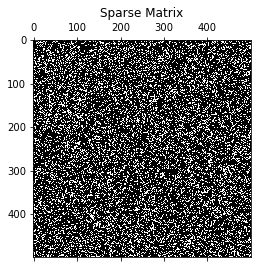

In [19]:
plt.spy(A)
plt.title("Sparse Matrix");

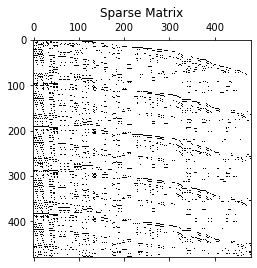

In [15]:
plt.spy(rbs480a)
plt.title("Sparse Matrix");

In [20]:
from scipy.sparse import csr_matrix
sparse_dataset = csr_matrix(dataset)


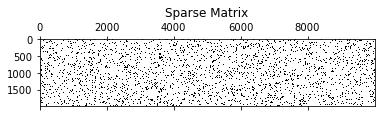

In [22]:
plt.spy(sparse_dataset.todense())
plt.title("Sparse Matrix");

C:\Users\Gary\.conda\envs\math793\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Compression')

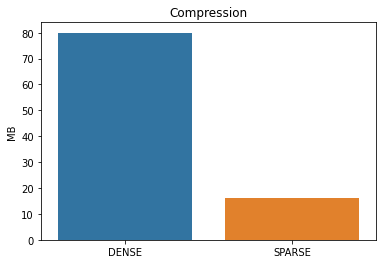

In [4]:
import seaborn as sns

dense_size = np.array(dataset).nbytes/1e6
sparse_size = (sparse_dataset.data.nbytes + sparse_dataset.indptr.nbytes + sparse_dataset.indices.nbytes)/1e6

sns.barplot(['DENSE', 'SPARSE'], [dense_size, sparse_size])
plt.ylabel('MB')
plt.title('Compression')

# Resources
* https://dziganto.github.io/Sparse-Matrices-For-Efficient-Machine-Learning/